In [40]:
import pandas as pd
import numpy as np
import json

In [41]:
# data_ = pd.read_excel("hasil_prediksi\svm\seleksi/seleksi_all_fuzzy.xlsx") #hasil_prediksi\svm\seleksi seleksi_all_fuzzy_18_ribu
data_ = pd.read_excel("hasil_prediksi\svm\seleksi/seleksi_all_fuzzy_18_ribu.xlsx")
latih_cm = data_['komentar'].tolist()
label_cm = data_['label'].tolist()
data_.head()

,Column1,label,komentar,Column2
0,0,non spam,zzeza17 baca dari atas komen km ga salah macam...,NaN
1,1,non spam,zy zy1321 aku syukur ko,NaN
2,2,spam,zuma99 com agen bandar domino bandar poket onl...,NaN
3,3,non spam,zulrobertsihombing anak bapak kayak sun,NaN
4,4,non spam,zulfikar165 makasih atas kritik masuk nya aku ...,NaN


non spam    15097
spam         3501
Name: label, dtype: int64

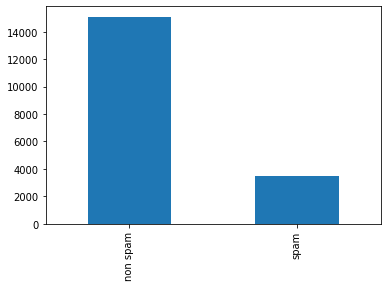

In [43]:
pd.value_counts(data_['label']).plot.bar(title='')
pd.value_counts(data_['label'])

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump
#membuat TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix_save = tfidf.fit(latih_cm)
tfidf_matrix_ = tfidf.fit_transform(latih_cm) #For CM
print(tfidf_matrix_.shape)
X_ = tfidf_matrix_.toarray()
Y_ = np.array(label_cm)
fitur = tfidf.get_feature_names()
#y = np.array(kode)

# dump(tfidf_matrix_save, 'model/cnb/tfdf_model_18.joblib')
# dump(tfidf_matrix_save, 'model/gnb/tfdf_model_18.joblib')

(18598, 24181)


In [45]:
dict_fitur_spam = dict()
dict_fitur_non_spam = dict()
for i in fitur:
    dict_fitur_spam.update({i:0})
    dict_fitur_non_spam.update({i:0})

In [49]:
for i, j in zip(latih_cm, label_cm):
    if j == 'spam':
        i = i.split()
        for j in i:
            if j in dict_fitur:
                dict_fitur_spam[j]+=1
    else:
        i = i.split()
        for j in i:
            if j in dict_fitur:
                dict_fitur_non_spam[j]+=1
dict_fitur_spam_ = sorted(dict_fitur_spam.items(), key = lambda x : x[1], reverse=True)
a = list()
b = list()
for i in dict_fitur_spam_:
    a.append(i[0])
    b.append(i[1])
dc_spam = dict(zip(a,b))
with open("model/dict_fitur_spam.json", 'w') as f:
    json.dump(dc_spam, f)
    
dict_fitur_non_spam_ = sorted(dict_fitur_non_spam.items(), key = lambda x : x[1], reverse=True)
a = list()
b = list()
for i in dict_fitur_non_spam_:
    a.append(i[0])
    b.append(i[1])
dc_spam = dict(zip(a,b))
with open("model/dict_fitur_non_spam.json", 'w') as f:
    json.dump(dc_spam, f)

In [5]:
#Parameter SVM
# C = 1.8
# gamma = 0.7

alpha = 8.15

In [6]:
K = 10 #pembagian data uji dan data latih
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score #, precision_score, recall_score
kf= KFold(n_splits=K) 
skf = StratifiedKFold(n_splits=K,random_state=2, shuffle=True)
skf

StratifiedKFold(n_splits=10, random_state=2, shuffle=True)

In [7]:
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB

In [ ]:
comNB = ComplementNB(alpha = alpha)
clf = GaussianNB()

# akurasi_svm = []
akurasi_cnb = []
akurasi_gnb = []
ii = 0
for train_index, test_index in skf.split(X_, Y_):
    print(ii+1, end="")
    ii+=1
    #membagi data latih dan data uji
    X_train, X_test = X_[train_index], X_[test_index] #pembagian data latih
    y_train, y_test = Y_[train_index], Y_[test_index]
    
    #Melatih Model
    mCNB = comNB.fit(X_train, y_train)
    mGNB = clf.fit(X_train, y_train)
    print("p ", end="-")
    #proses prediksi
#     P_SVM = mSVM.predict(X_test)
    P_CNB = mCNB.predict(X_test)
    P_GNB = mGNB.predict(X_test)
    
    #menyimpan hasil akurasi tiap iterasi
    akurasi_cnb.append(accuracy_score(y_test, P_CNB))
    akurasi_gnb.append(accuracy_score(y_test, P_GNB))
    
# rerata_akurasi_svm = sum(akurasi_svm)/len(akurasi_svm)
rerata_akurasi_cnb = sum(akurasi_cnb)/len(akurasi_cnb)
rerata_akurasi_gnb = sum(akurasi_gnb)/len(akurasi_gnb)

print("")
print("----------------------------------------")
print("Hasil K-Fold GNB")
print("   akurasi   :",rerata_akurasi_gnb)
print("----------------------------------------")
print("Hasil K-Fold CNB")
print("     Aplha   :",alpha)
print("   akurasi   :",rerata_akurasi_cnb)

1p -2p -3p -4p -5p -6p -7

In [8]:
comNB = ComplementNB(alpha = alpha)
clf = GaussianNB()

#Melatih Model untuk data secara keseluruhan (X dan Y)
mGNB = clf.fit(X_, Y_)
comNB = comNB.fit(X_, Y_) #CNB

#save models
dump(comNB, 'model/cnb/CNB_MODEL_18.joblib')
dump(mGNB, 'model/gnb/GNB_MODEL_18.joblib')

MemoryError: 